In [1]:
import pandas as pd
import osmnx as ox
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

In [2]:
DANGER_DF_FILEPATH = "../../data/consolidated_danger_by_node_id.pkl.gz"
GRAPH_FILEPATH = "../../data/consolidated_mnh_below_34th.graphml"

In [3]:
danger_node_df = pd.read_pickle(DANGER_DF_FILEPATH)

In [4]:
G = ox.io.load_graphml(GRAPH_FILEPATH)

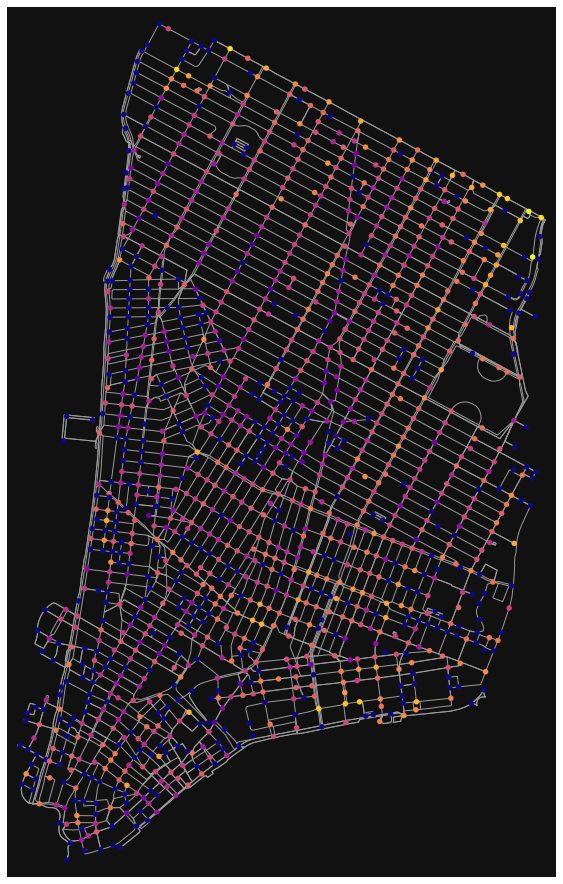

(<Figure size 1152x1152 with 1 Axes>, <AxesSubplot:>)

In [5]:
nx.set_node_attributes(G, danger_node_df.DANGER, "danger")

nc = ox.plot.get_node_colors_by_attr(G, "danger", cmap="plasma")

ox.plot.plot_graph(
    G,
    figsize=(16, 16),
    node_size=30,
    node_color=nc
)

In [6]:
len(G.nodes)

1263

In [7]:
node_df = pd.DataFrame.from_dict({i: G.nodes[i] for i in range(len(G.nodes))}, orient="index")

In [8]:
node_df

,osmid_original,y,x,street_count,crash_avg,danger,lon,lat,highway
0,42421828,4.508770e+06,586459.280719,3.0,0.0,0.000000,-73.976212,40.725326,NaN
1,42430942,4.508722e+06,586548.367848,4.0,4.722819044419704,4.722819,-73.975164,40.724877,traffic_signals
2,42430938,4.508831e+06,586346.713008,4.0,3.7712281211757004,3.771228,-73.977536,40.725883,traffic_signals
3,"[42421837, 5481976931, 5481976926]",4.508908e+06,586564.151727,NaN,NaN,0.000000,NaN,NaN,NaN
4,"[42421877, 8475999052, 42433354, 42437949, 830...",4.509534e+06,584759.228753,NaN,NaN,4.090534,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
1258,8095882130,4.507237e+06,583663.063274,3.0,2.9339794379434965,2.933979,-74.009523,40.711806,NaN
1259,42446678,4.512180e+06,583964.409871,3.0,0.0,0.000000,-74.005293,40.756296,NaN
1260,"[8288262780, 8288262779]",4.509302e+06,583287.131348,NaN,NaN,0.000000,NaN,NaN,NaN
1261,8288560711,4.511086e+06,583721.549163,3.0,0.0,0.000000,-74.008316,40.746469,NaN


In [9]:
sum(node_df["lon"].isna())

478

Need to use x and y instead of lat and lon - those details are lost when consolidating nodes and too many nodes were consolated in our final (478 of 1263 nodes have lon as NA)

In [10]:
G.nodes[0]["osmid_original"]

'42421828'

In [11]:
len(list(G.nodes))

1263

In [12]:
danger_node_df

,DANGER,OLD_NODE_IDS
0,0.000000,[42421828]
1,4.722819,[42430942]
2,3.771228,[42430938]
3,0.000000,"[42421837, 5481976931, 5481976926]"
4,4.090534,"[42421877, 8475999052, 42433354, 42437949, 830..."
...,...,...
1258,2.933979,[8095882130]
1259,0.000000,[42446678]
1260,0.000000,"[8288262780, 8288262779]"
1261,0.000000,[8288560711]


In [13]:
danger_node_df["OLD_NODE_IDS"]

0                                              [42421828]
1                                              [42430942]
2                                              [42430938]
3                      [42421837, 5481976931, 5481976926]
4       [42421877, 8475999052, 42433354, 42437949, 830...
                              ...                        
1258                                         [8095882130]
1259                                           [42446678]
1260                             [8288262780, 8288262779]
1261                                         [8288560711]
1262                                         [8288560714]
Name: OLD_NODE_IDS, Length: 1263, dtype: object

In [14]:
danger_node_df["id"] = danger_node_df.index

In [15]:
danger_node_df

,DANGER,OLD_NODE_IDS,id
0,0.000000,[42421828],0
1,4.722819,[42430942],1
2,3.771228,[42430938],2
3,0.000000,"[42421837, 5481976931, 5481976926]",3
4,4.090534,"[42421877, 8475999052, 42433354, 42437949, 830...",4
...,...,...,...
1258,2.933979,[8095882130],1258
1259,0.000000,[42446678],1259
1260,0.000000,"[8288262780, 8288262779]",1260
1261,0.000000,[8288560711],1261


In [16]:
type(danger_node_df["OLD_NODE_IDS"][0][0])

int

In [17]:
CENSUS_TO_NODE_FILEPATH = "../../data/node_id_census_tract_key.csv"

In [18]:
census_to_node_mapping = pd.read_csv(CENSUS_TO_NODE_FILEPATH)

In [19]:
census_to_node_mapping

,osmid,ct2010
0,42421828,2800
1,42421837,2800
2,42430924,2800
3,42430938,2800
4,42436957,2800
...,...,...
2582,3655974177,2000
2583,3783088880,2000
2584,3884582047,2000
2585,4301308506,2000


In [20]:
census_to_node_mapping[census_to_node_mapping["osmid"]==42421828]

,osmid,ct2010
0,42421828,2800


In [21]:
type(census_to_node_mapping["osmid"][0])

numpy.int64

In [22]:
LONG_NAME_FILEPATH = "../../data/DUMMY_CRASH_AVG_FOR_CORRELATION_TESTS_node_id_census_tract_key.csv"

In [23]:
correlation_tests_df = pd.read_csv(LONG_NAME_FILEPATH)

In [24]:
correlation_tests_df

,Unnamed: 0,CRASH_AVG,NODE_ID,CENSUS_TRACT_ID
0,0,0.000000,42421828,2800
1,1,0.000000,42421837,2800
2,27,0.000272,42421877,6300
3,52,0.000032,42421889,7100
4,72,0.000000,42421927,5502
...,...,...,...,...
2067,878,0.000384,9149294706,3100
2068,2463,0.000000,9165725162,7000
2069,2077,0.000047,9166033061,3001
2070,2479,0.000385,9166033062,3002


## Question
What is "Unnamed: 0"?

In [25]:
CENSUS_RACE_INCOME_CLEAN_FILEPATH = "../../data/census_race_income_clean.csv"

In [26]:
census_race_income_clean_df = pd.read_csv(CENSUS_RACE_INCOME_CLEAN_FILEPATH)

In [27]:
census_race_income_clean_df

,Unnamed: 0,boro_code,boro_ct201,boro_name,cdeligibil,ct2010,ctlabel,ntacode,ntaname,puma,...,ASIAN_PERCENT,HISPANIC_PERCENT,LESS_THAN_10000_PERCENT,100000_TO_124999_PERCENT,125000_TO_149999_PERCENT,150000_TO_199999_PERCENT,200000_OR_MORE_PERCENT,10000_TO_24999_PERCENT,25000_TO_49999_PERCENT,50000_TO_99999_PERCENT
0,0,1,1009800,Manhattan,I,9800,98.00,MN19,Turtle Bay-East Midtown,3808,...,10.832649,9.832922,3.206035,5.869873,5.940594,8.180104,37.364451,11.197548,7.260726,20.980669
1,1,1,1010200,Manhattan,I,10200,102.00,MN17,Midtown-Midtown South,3807,...,1.639344,11.475410,7.575758,12.121212,27.272727,0.000000,6.060606,39.393939,0.000000,7.575758
2,2,1,1010400,Manhattan,I,10400,104.00,MN17,Midtown-Midtown South,3807,...,19.235512,9.001233,4.214559,14.559387,10.153257,7.854406,33.141762,8.045977,3.831418,18.199234
3,3,1,1011300,Manhattan,I,11300,113.00,MN17,Midtown-Midtown South,3807,...,33.673469,0.000000,20.754717,9.433962,18.867925,9.433962,5.660377,0.000000,13.207547,22.641509
4,4,1,1013000,Manhattan,I,13000,130.00,MN40,Upper East Side-Carnegie Hill,3805,...,4.345202,5.461678,1.341532,5.701509,0.950252,8.887647,49.916154,2.794857,10.732253,19.675797
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283,283,1,1014300,Manhattan,I,14300,143.00,MN99,park-cemetery-etc-Manhattan,3806,...,0.000000,50.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
284,284,1,1022102,Manhattan,E,22102,221.02,MN03,Central Harlem North-Polo Grounds,3803,...,5.105566,13.243762,5.746141,7.204117,14.408233,11.663808,14.236707,12.692967,10.548885,23.499142
285,285,1,1022700,Manhattan,E,22700,227.00,MN04,Hamilton Heights,3802,...,5.289383,36.297432,8.432631,14.573786,6.003666,8.111824,7.057745,22.318973,13.428048,20.073327
286,286,1,1014802,Manhattan,I,14802,148.02,MN40,Upper East Side-Carnegie Hill,3805,...,10.362854,12.376999,3.714020,9.501702,5.075828,13.679975,33.735686,5.044878,9.285051,19.962860


In [28]:
census_race_income_clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 288 entries, 0 to 287
Data columns (total 42 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                288 non-null    int64  
 1   boro_code                 288 non-null    int64  
 2   boro_ct201                288 non-null    int64  
 3   boro_name                 288 non-null    object 
 4   cdeligibil                288 non-null    object 
 5   ct2010                    288 non-null    int64  
 6   ctlabel                   288 non-null    float64
 7   ntacode                   288 non-null    object 
 8   ntaname                   288 non-null    object 
 9   puma                      288 non-null    int64  
 10  shape_area                288 non-null    float64
 11  shape_leng                288 non-null    float64
 12  geometry                  288 non-null    object 
 13  CENSUS_TRACT              288 non-null    int64  
 14  RACE_TOTAL

In [29]:
census_race_income_clean_df["ct2010"]

0       9800
1      10200
2      10400
3      11300
4      13000
       ...  
283    14300
284    22102
285    22700
286    14802
287    14801
Name: ct2010, Length: 288, dtype: int64

In [30]:
census_race_income_clean_df["LESS_THAN_10000_PERCENT"]

0       3.206035
1       7.575758
2       4.214559
3      20.754717
4       1.341532
         ...    
283          NaN
284     5.746141
285     8.432631
286     3.714020
287     2.758133
Name: LESS_THAN_10000_PERCENT, Length: 288, dtype: float64

Because many OSM IDs are combined when we simplified the graph to create `danger_node_df`, it'll just be easier if we "re-find" the census tract instead of doing a lookup in `correlation_tests_df`

In [31]:
def census_tract_danger_lookup(_x, census_to_node_mapping_df):
    old_ids = _x["OLD_NODE_IDS"]
    
    census_tracts = []
    for i in old_ids:
        census_tract = list(census_to_node_mapping_df[census_to_node_mapping_df["osmid"]==i]["ct2010"])        
        census_tracts.extend(census_tract)
        
    if len(set(census_tracts)) == 1:
        return census_tracts[0]
    
    elif len(set(census_tracts)) > 1:
        return census_tracts

    return 0

In [32]:
danger_node_df

,DANGER,OLD_NODE_IDS,id
0,0.000000,[42421828],0
1,4.722819,[42430942],1
2,3.771228,[42430938],2
3,0.000000,"[42421837, 5481976931, 5481976926]",3
4,4.090534,"[42421877, 8475999052, 42433354, 42437949, 830...",4
...,...,...,...
1258,2.933979,[8095882130],1258
1259,0.000000,[42446678],1259
1260,0.000000,"[8288262780, 8288262779]",1260
1261,0.000000,[8288560711],1261


In [33]:
danger_node_df["census_tract"] = danger_node_df.apply(
    census_tract_danger_lookup,
    args=(census_to_node_mapping,),
    axis=1
)

In [34]:
danger_node_df

,DANGER,OLD_NODE_IDS,id,census_tract
0,0.000000,[42421828],0,2800
1,4.722819,[42430942],1,2400
2,3.771228,[42430938],2,2800
3,0.000000,"[42421837, 5481976931, 5481976926]",3,2800
4,4.090534,"[42421877, 8475999052, 42433354, 42437949, 830...",4,"[6300, 6300, 6300, 6300, 5900, 5900, 5900, 630..."
...,...,...,...,...
1258,2.933979,[8095882130],1258,1300
1259,0.000000,[42446678],1259,9900
1260,0.000000,"[8288262780, 8288262779]",1260,6900
1261,0.000000,[8288560711],1261,9900


This is a little messed up because we can see some edges where there is an overlap of census tracts at consolidated nodes, but we could probably just alleviate this by averaging the median income or something

In [35]:
percent_income_column_names = [
    "LESS_THAN_10000_PERCENT",
    "100000_TO_124999_PERCENT",
    "125000_TO_149999_PERCENT",
    "150000_TO_199999_PERCENT",
    "200000_OR_MORE_PERCENT",
    "10000_TO_24999_PERCENT",
    "25000_TO_49999_PERCENT",
    "50000_TO_99999_PERCENT"
]

In [36]:
def get_avg_percent_incomes(_x, census_df, col_name):
    census_tract = _x["census_tract"]
    
    if type(census_tract) != list:
        census_tract = [census_tract]
    
    under_10000_percent = []
    for i in census_tract:
        under_10000_percent.extend(census_df[census_df["ct2010"]==i][col_name].to_list())
        
    under_10000_percent = np.nan_to_num(under_10000_percent)
    
    return np.mean(under_10000_percent)

In [37]:
for i in percent_income_column_names:
    danger_node_df["x"+i] = danger_node_df.apply(
        get_avg_percent_incomes,
        args=(census_race_income_clean_df, i,),
        axis=1
    )

Note that I had to add a leading "x" here because statsmodels does not like labels that start with a numeral

In [38]:
danger_node_df

,DANGER,OLD_NODE_IDS,id,census_tract,xLESS_THAN_10000_PERCENT,x100000_TO_124999_PERCENT,x125000_TO_149999_PERCENT,x150000_TO_199999_PERCENT,x200000_OR_MORE_PERCENT,x10000_TO_24999_PERCENT,x25000_TO_49999_PERCENT,x50000_TO_99999_PERCENT
0,0.000000,[42421828],0,2800,13.914328,4.963072,4.401773,5.228951,11.580502,22.186115,19.852290,17.872969
1,4.722819,[42430942],1,2400,29.513514,0.000000,0.000000,0.000000,0.486486,37.513514,23.513514,8.972973
2,3.771228,[42430938],2,2800,13.914328,4.963072,4.401773,5.228951,11.580502,22.186115,19.852290,17.872969
3,0.000000,"[42421837, 5481976931, 5481976926]",3,2800,13.914328,4.963072,4.401773,5.228951,11.580502,22.186115,19.852290,17.872969
4,4.090534,"[42421877, 8475999052, 42433354, 42437949, 830...",4,"[6300, 6300, 6300, 6300, 5900, 5900, 5900, 630...",4.591767,6.651157,9.354719,10.001125,38.508426,6.236465,8.766959,15.889383
...,...,...,...,...,...,...,...,...,...,...,...,...
1258,2.933979,[8095882130],1258,1300,1.512801,10.822343,6.749418,17.067494,39.410396,2.754073,7.370054,14.313421
1259,0.000000,[42446678],1259,9900,4.953820,7.108872,7.780577,12.258606,35.740274,9.795690,7.360761,15.001399
1260,0.000000,"[8288262780, 8288262779]",1260,6900,0.000000,7.430618,3.312444,10.743062,56.580125,5.371531,4.028648,12.533572
1261,0.000000,[8288560711],1261,9900,4.953820,7.108872,7.780577,12.258606,35.740274,9.795690,7.360761,15.001399


In [39]:
X = danger_node_df["xLESS_THAN_10000_PERCENT"].values

In [40]:
y = danger_node_df["DANGER"].values

Sweet sweet, now we can look for a correlation between the danger and the average percent of census tract residents making under $10,000

In [41]:
from sklearn.linear_model import LinearRegression

In [42]:
reg = LinearRegression()
reg.fit(X.reshape(-1, 1), y)

LinearRegression()

In [43]:
reg.coef_

array([0.02329507])

In [44]:
reg.intercept_

2.0640383170330314

In [45]:
danger_node_df.columns

Index(['DANGER', 'OLD_NODE_IDS', 'id', 'census_tract',
       'xLESS_THAN_10000_PERCENT', 'x100000_TO_124999_PERCENT',
       'x125000_TO_149999_PERCENT', 'x150000_TO_199999_PERCENT',
       'x200000_OR_MORE_PERCENT', 'x10000_TO_24999_PERCENT',
       'x25000_TO_49999_PERCENT', 'x50000_TO_99999_PERCENT'],
      dtype='object')

In [46]:
import statsmodels.api as sm

fitted_model = sm.OLS.from_formula(
    'DANGER ~ xLESS_THAN_10000_PERCENT + x100000_TO_124999_PERCENT + x125000_TO_149999_PERCENT + x150000_TO_199999_PERCENT + x200000_OR_MORE_PERCENT + x10000_TO_24999_PERCENT + x25000_TO_49999_PERCENT + x50000_TO_99999_PERCENT',
    data=danger_node_df
).fit()

fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 DANGER   R-squared:                       0.041
Model:                            OLS   Adj. R-squared:                  0.034
Method:                 Least Squares   F-statistic:                     6.630
Date:                Tue, 30 Nov 2021   Prob (F-statistic):           1.63e-08
Time:                        14:54:39   Log-Likelihood:                -2446.7
No. Observations:                1263   AIC:                             4911.
Df Residuals:                    1254   BIC:                             4958.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                     0.8310      1.121      0.741      0.459      -1.368       3.030
xLESS_THAN_10000_PERCENT      0.0102      0.019      0.552      0.581      -0.026       0.047
x100000_TO_124999_PERCENT     0.0146      0.019      0.786      0.432      -0.022       0.051
x125000_TO_149999_PERCENT     0.0851      0.022      3.840      0.000       0.042       0.129
x150000_TO_199999_PERCENT    -0.0088      0.019     -0.477      0.634      -0.045       0.028
x200000_OR_MORE_PERCENT      -0.0011      0.012     -0.097      0.923      -0.024       0.022
x10000_TO_24999_PERCENT       0.0131      0.014      0.929      0.353      -0.015       0.041
x25000_TO_49999_PERCENT      -0.0005      0.015     -0.030      0.976      -0.030       0.029
x50000_TO_99999_PERCENT       0.0401      0.014      2.848      0.004       0.012       0.068
==============================================================================
Omnibus:                     1612.379   Durbin-Watson:                   1.709
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               90.089
Skew:                          -0.186   Prob(JB):                     2.74e-20
Kurtosis:                       1.746   Cond. No.                         987.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""